<a href="https://colab.research.google.com/github/Heba2424/DEPI_Projects/blob/main/Copy_of_Hands_on_EDA_%26_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading from Drive

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#https://drive.google.com/file/d/1v54nqQoexM00y0X6CqkEwV_aHIPMq11r/view?usp=sharing
file_id = '1v54nqQoexM00y0X6CqkEwV_aHIPMq11r'
url = f'https://drive.google.com/uc?export=download&id={file_id}'


df = pd.read_csv(url)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [ ]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109489
OvertimePay          65998
OtherPay             83225
Benefits             98465
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Notes                    0
Agency                   1
Status                   0
dtype: int64

In [ ]:
df.Agency.value_counts()

Agency
San Francisco    148654
Name: count, dtype: int64

In [ ]:
unique_job_titles = df['Agency'].unique()
unique_job_titles.shape

(1,)

In [ ]:
df.EmployeeName.value_counts()

EmployeeName
Kevin Lee              13
Richard Lee            11
Steven Lee             11
William Wong           11
John Chan               9
                       ..
Nicholas Josefowitz     1
Marica S Petrey         1
Robert B Woodville      1
Richard E Aicardi       1
Thomas A Harris         1
Name: count, Length: 110811, dtype: int64

In [ ]:
df.JobTitle.value_counts()

JobTitle
Transit Operator                  7036
Special Nurse                     4389
Registered Nurse                  3736
Public Svc Aide-Public Works      2518
Police Officer 3                  2421
                                  ... 
Undersheriff (SFERS)                 1
Light Rail Vehicle Equip Eng         1
Sr Sprv Prob Ofc, Juv Prob           1
Administrative Hearing Sup           1
Musm Exhibit Packer & Repairer       1
Name: count, Length: 2159, dtype: int64

In [ ]:
unique_job_titles = df['JobTitle'].unique()
unique_job_titles.shape

(2159,)

In [ ]:
df.Year.value_counts()

Year
2014    38123
2013    37606
2012    36766
2011    36159
Name: count, dtype: int64

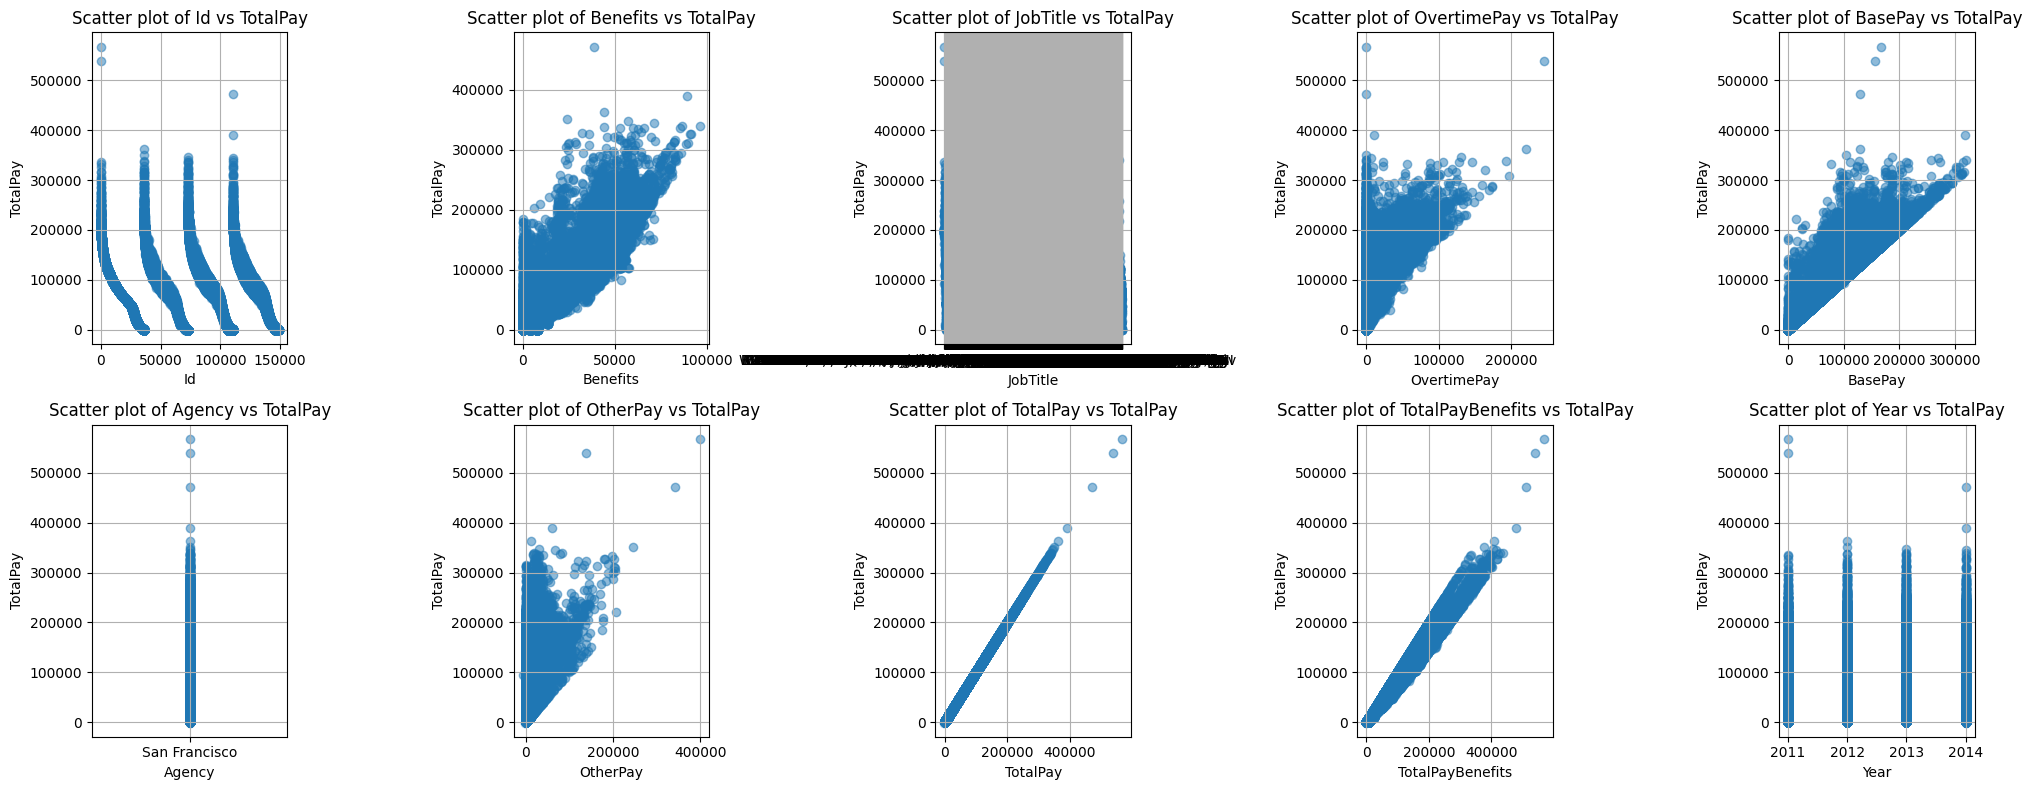

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.flatten()

cols_for_hist=[ 'Id', 'Benefits','JobTitle','OvertimePay','BasePay' ,'Agency','OtherPay', 'TotalPay', 'TotalPayBenefits', 'Year']

# Plot scatter plots for each feature column against the target column
for i, column in enumerate(cols_for_hist):
    axs[i].scatter(df[column], df['TotalPay'], alpha=0.5)
    axs[i].set_title(f'Scatter plot of {column} vs TotalPay')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('TotalPay')
    axs[i].grid(True)

# Hide empty subplots
for i in range(len(df.columns), 2 * 5):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


<Axes: xlabel='TotalPay', ylabel='Count'>

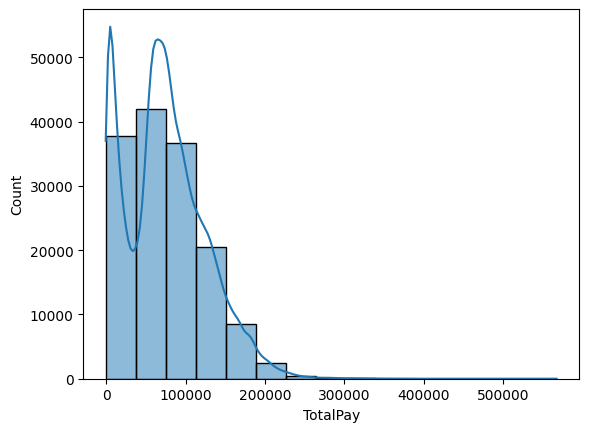

In [ ]:
sns.histplot(df['TotalPay'],kde=True,bins=15)

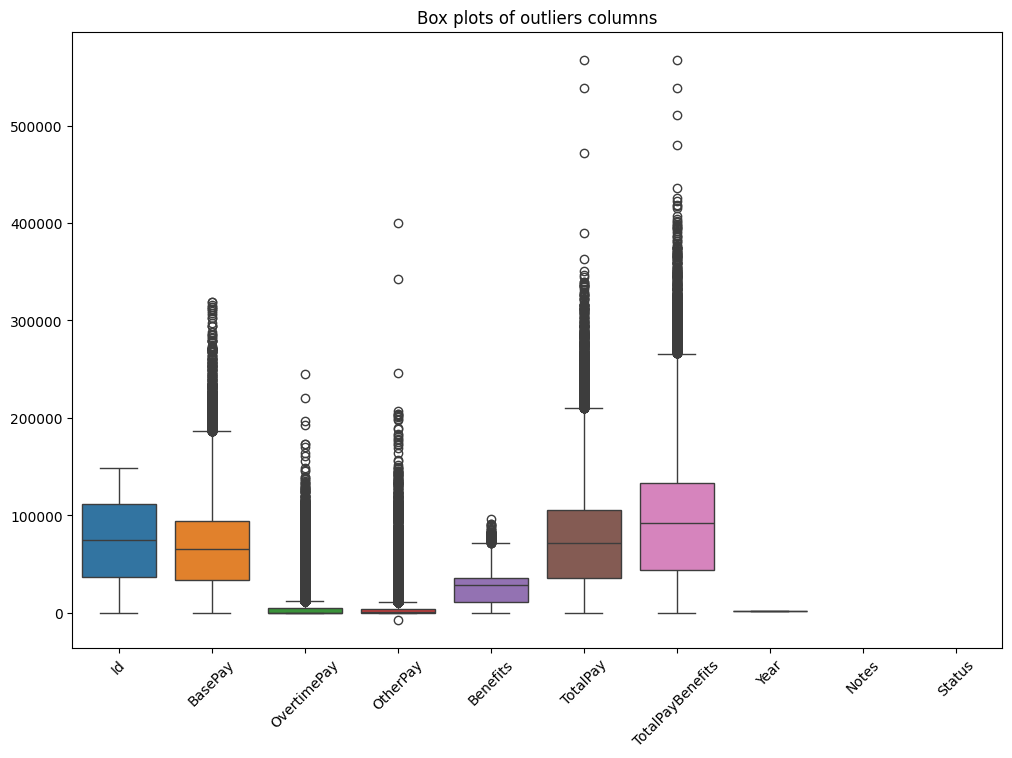

In [ ]:
plt.figure( figsize=(12,8 ) )  # Adjust the figure size as needed
sns.boxplot(data=df)
plt.title('Box plots of outliers columns')
plt.xticks(rotation=45)# Rotate x-axis labels for better readability if needed
plt.show()

#Data Preprocessing

### Feature Selection

In [ ]:
df.drop(['Notes'],axis=1 ,inplace=True)

In [ ]:
df.drop(['Status'],axis=1 ,inplace=True)

In [ ]:
df.drop(['EmployeeName'],axis=1 ,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['JobTitle'] = label.fit_transform(df['JobTitle'])
df['JobTitle']

0          831
1          293
2          293
3         2125
4          576
          ... 
148649     562
148650    1274
148651    1274
148652    1274
148653     523
Name: JobTitle, Length: 148654, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['Agency'] = label.fit_transform(df['Agency'])
df['Agency']

0         0
1         0
2         0
3         0
4         0
         ..
148649    0
148650    0
148651    0
148652    0
148653    0
Name: Agency, Length: 148654, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   JobTitle          148654 non-null  int64  
 2   BasePay           148045 non-null  float64
 3   OvertimePay       148650 non-null  float64
 4   OtherPay          148650 non-null  float64
 5   Benefits          112491 non-null  float64
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  int64  
 9   Agency            148654 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 11.3 MB


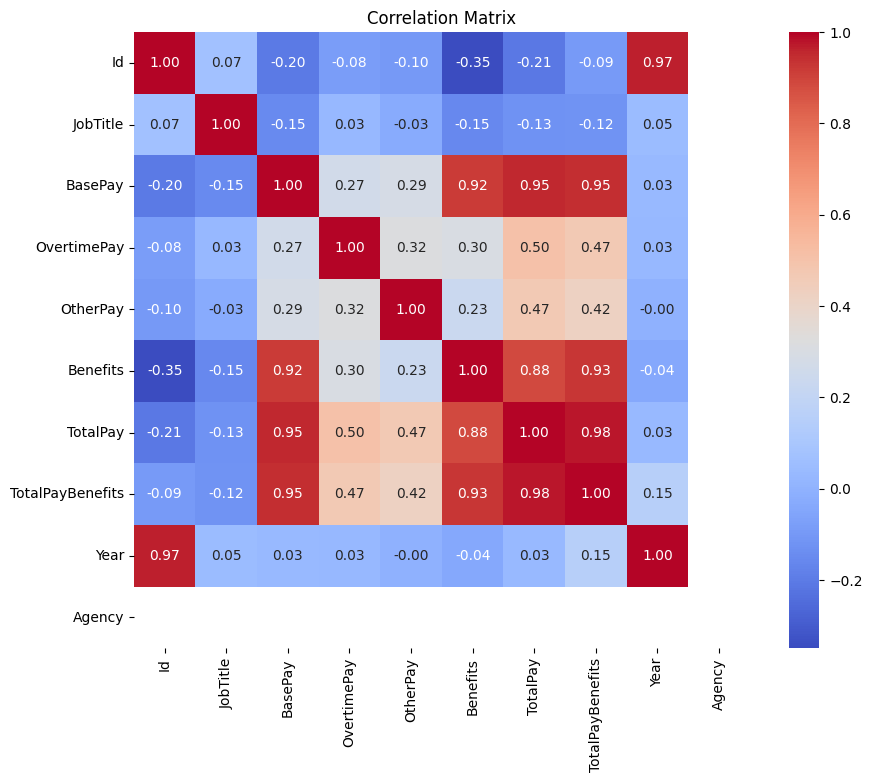

In [ ]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, fmt=".2f",
            xticklabels=df.columns, yticklabels=df.columns)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.drop(['Agency'],axis=1 ,inplace=True)

In [ ]:
df.drop(['Benefits'],axis=1 ,inplace=True)

In [ ]:
df.drop(['BasePay'],axis=1 ,inplace=True)

In [ ]:
df.drop(['Year'],axis=1 ,inplace=True)

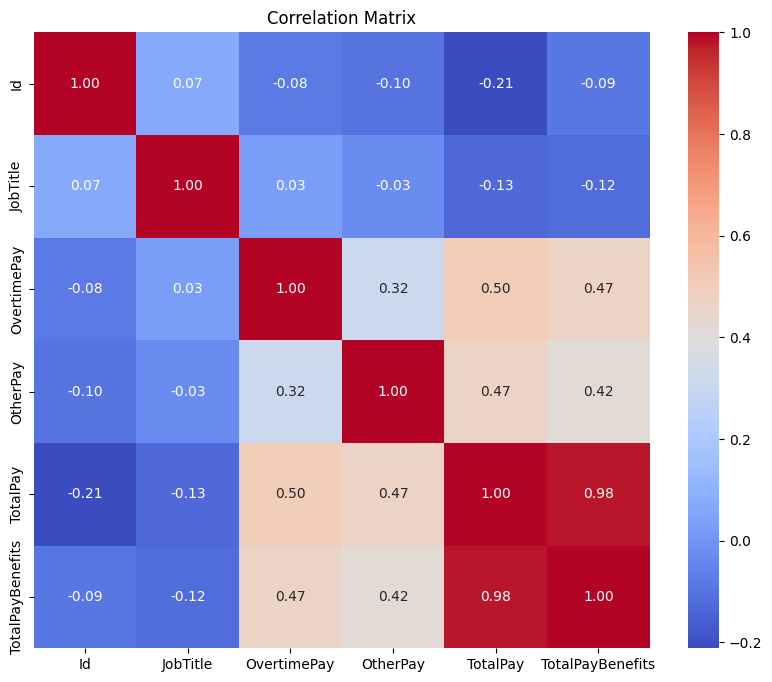

In [ ]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, fmt=".2f",
            xticklabels=df.columns, yticklabels=df.columns)
plt.title('Correlation Matrix')
plt.show()

### Remove Outliers

In [ ]:
def remove_outliers_iqr(df, multiplier=1.5):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    return df[(df >= lower_bound) & (df <= upper_bound)]

In [ ]:
df.shape

(148654, 6)

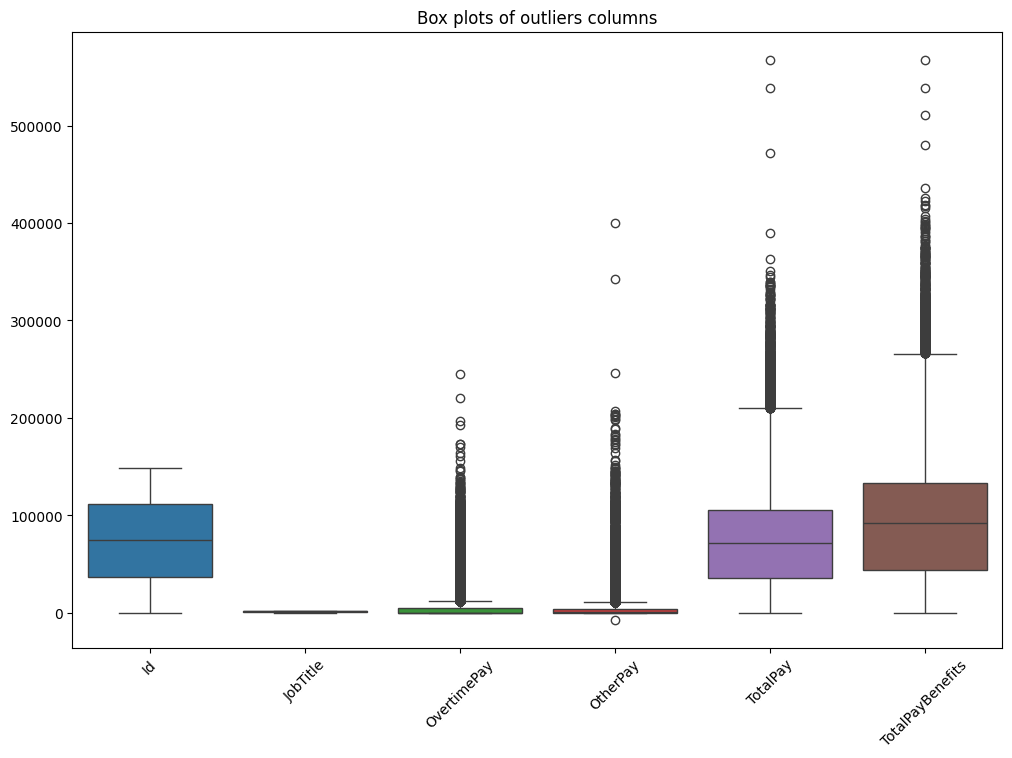

In [ ]:
plt.figure( figsize=(12,8 ) )  # Adjust the figure size as needed
sns.boxplot(data=df)
plt.title('Box plots of outliers columns')
plt.xticks(rotation=45)# Rotate x-axis labels for better readability if needed
plt.show()

In [ ]:
df1 = df.copy()
df1 = remove_outliers_iqr(df1)

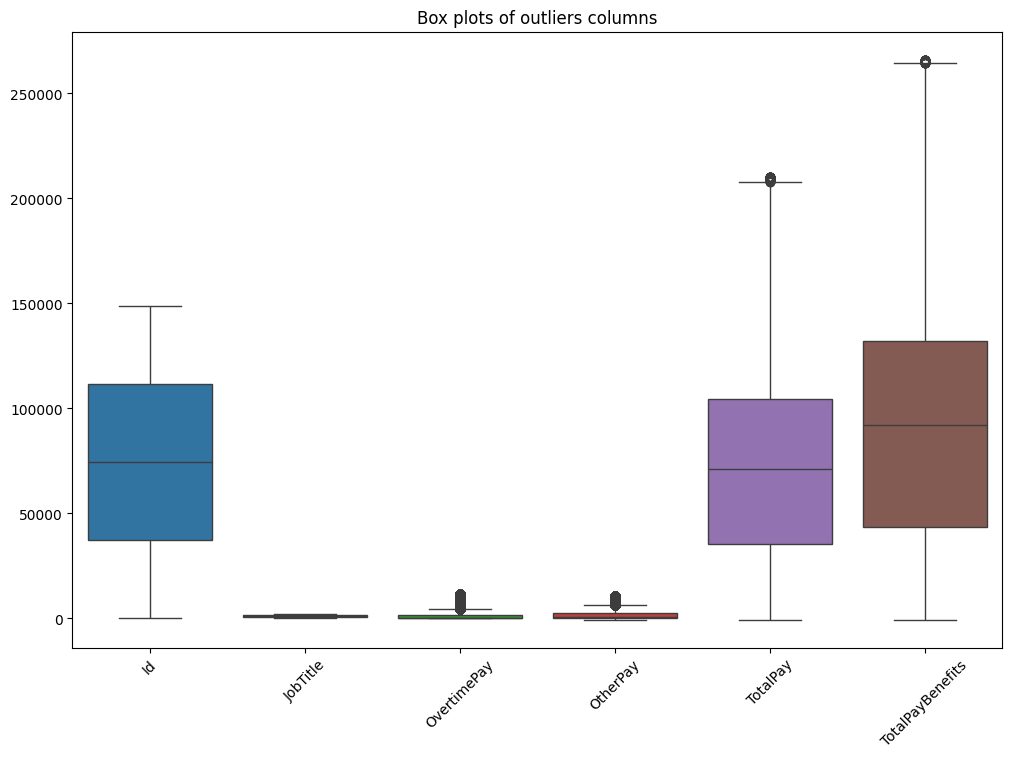

In [ ]:
plt.figure( figsize=(12,8 ) )  # Adjust the figure size as needed
sns.boxplot(data=df1)
plt.title('Box plots of outliers columns')
plt.xticks(rotation=45)# Rotate x-axis labels for better readability if needed
plt.show()

In [ ]:
df1.isnull().sum()

Id                      0
JobTitle                0
OvertimePay         20192
OtherPay            15182
TotalPay             1286
TotalPayBenefits      933
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

# Impute missing values using k-NN
imputer = KNNImputer(n_neighbors=2)
df_imputed_knn = pd.DataFrame(imputer.fit_transform(df1), columns=df.columns)

df_imputed_knn

,Id,JobTitle,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,1.0,831.0,0.000,0.000,209847.555,240572.525
1,2.0,293.0,0.000,2866.200,208656.555,255236.185
2,3.0,293.0,0.000,2866.200,208656.555,255236.185
3,4.0,2125.0,1216.645,7123.635,206860.050,226324.115
4,5.0,576.0,9737.000,5979.845,208559.195,245502.360
...,...,...,...,...,...,...
148649,148650.0,562.0,0.000,0.000,0.000,0.000
148650,148651.0,1274.0,0.000,24.975,0.000,0.000
148651,148652.0,1274.0,0.000,24.975,0.000,0.000
148652,148653.0,1274.0,0.000,24.975,0.000,0.000


In [ ]:
df_imputed_knn.isna().sum()

Id                  0
JobTitle            0
OvertimePay         0
OtherPay            0
TotalPay            0
TotalPayBenefits    0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed_knn)
scaled_df = pd.DataFrame(scaled_data, columns=df_imputed_knn.columns)

In [ ]:
scaled_df.head()

,Id,JobTitle,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,-1.732039,-0.725547,-0.622996,-0.767056,2.750890,2.393593
1,-1.732016,-1.672301,-0.622996,0.282809,2.726755,2.631239
2,-1.731993,-1.672301,-0.622996,0.282809,2.726755,2.631239
3,-1.731969,1.551590,-0.206297,1.842272,2.690351,2.162677
4,-1.731946,-1.174288,2.711908,1.423311,2.724782,2.473489


### split Data

In [ ]:
X = scaled_df.copy()
y = X.pop('TotalPay')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                384       
                                                                 
 dense_9 (Dense)             (None, 16)                1040      
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#training

In [ ]:
from tensorflow.keras.metrics import R2Score
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.1)

Epoch 1/30
1673/1673 [==============================] - 7s 3ms/step - loss: 0.0267 - mae: 0.0799 - mse: 0.0267 - val_loss: 0.0138 - val_mae: 0.0522 - val_mse: 0.0138
Epoch 2/30
1673/1673 [==============================] - 6s 4ms/step - loss: 0.0125 - mae: 0.0505 - mse: 0.0125 - val_loss: 0.0128 - val_mae: 0.0460 - val_mse: 0.0128
Epoch 3/30
1673/1673 [==============================] - 6s 3ms/step - loss: 0.0122 - mae: 0.0489 - mse: 0.0122 - val_loss: 0.0129 - val_mae: 0.0465 - val_mse: 0.0129
Epoch 4/30
1673/1673 [==============================] - 6s 4ms/step - loss: 0.0121 - mae: 0.0476 - mse: 0.0121 - val_loss: 0.0126 - val_mae: 0.0437 - val_mse: 0.0126
Epoch 5/30
1673/1673 [==============================] - 6s 3ms/step - loss: 0.0119 - mae: 0.0468 - mse: 0.0119 - val_loss: 0.0126 - val_mae: 0.0485 - val_mse: 0.0126
Epoch 6/30
1673/1673 [==============================] - 7s 4ms/step - loss: 0.0119 - mae: 0.0465 - mse: 0.0119 - val_loss: 0.0124 - val_mae: 0.0455 - val_mse: 0.0124
Epoc

#Evaluation

930/930 [==============================] - 2s 2ms/step
R2 Score: 0.9894219690781442


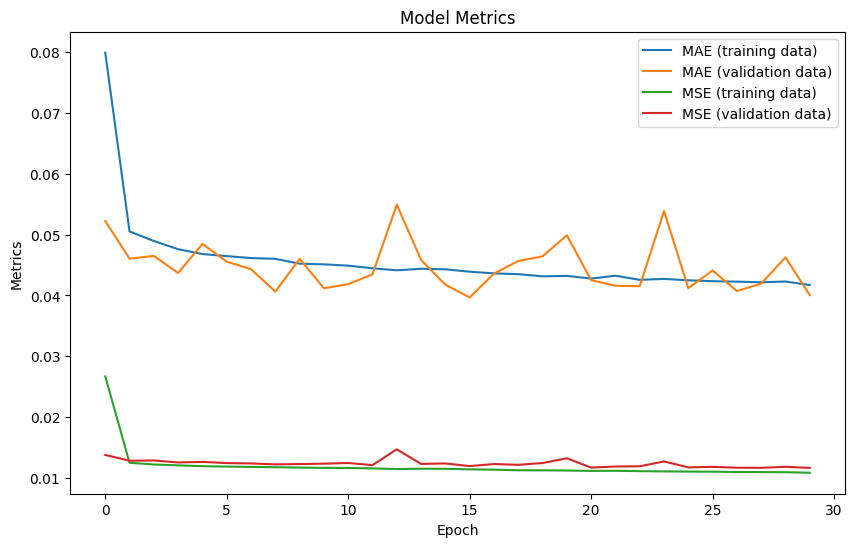

In [ ]:
from sklearn.metrics import r2_score

# Evaluate the model on test data
#loss, mae, mse = model.evaluate(X_test_scaled, y_test, verbose=0)
#print("Mean Absolute Error:", mae)
#print("Mean Squared Error:", mse)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate R2 score
r2_sqr = r2_score(y_test, y_pred)
print("R2 Score:", r2_sqr)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='MAE (training data)')
plt.plot(history.history['val_mae'], label='MAE (validation data)')
plt.plot(history.history['mse'], label='MSE (training data)')
plt.plot(history.history['val_mse'], label='MSE (validation data)')
plt.title('Model Metrics')
plt.ylabel('Metrics')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()